import libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read csv file

In [4]:
dataset = pd.read_csv("/content/User_Data.csv")

taking particular columns

In [5]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values

split the data set

In [6]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.25, random_state=0)


In [7]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [15]:
from sklearn.linear_model import LinearRegression
predictor=LinearRegression()
predictor.fit(xtrain,ytrain)


LinearRegression()

predicting on testing data

In [16]:
y_pred=predictor.predict(xtest)

In [17]:
y_pred

array([ 0.22077932,  0.29079271,  0.30761575,  0.18980184,  0.21081113,
       -0.11863865, -0.03135746,  0.60145703, -0.17271853,  0.50363218,
        0.0736363 ,  0.04354835,  0.28349311,  0.42200223, -0.04969815,
        0.39026593,  0.36868118, -0.08023086,  1.05379649,  0.10238995,
        0.19919457,  0.89472285,  0.37464648,  0.74370764, -0.19430329,
        0.93642735,  0.16745827,  0.1670135 ,  0.3105984 ,  0.2702282 ,
       -0.01529325,  0.37642555,  0.83606461,  0.27574874, -0.05147721,
       -0.23467349, -0.01573801,  0.1570453 ,  0.04221405,  0.52984794,
        0.14466992,  0.37851867,  0.12918118,  0.09464558,  0.66417082,
        0.02850438,  0.38029773,  0.81892751, -0.10657733,  0.72345718,
        1.07614007,  0.08734598,  0.23791642,  0.43584262,  0.99780684,
        0.40771709,  0.17863006,  0.08703191,  0.49887046, -0.22528076,
        0.00691962,  0.84634686, -0.11508053,  0.42720871, -0.30868977,
        1.00510644,  0.06856052,  0.02850438,  0.33249722,  0.47

confucion matrix

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained a classification model and made predictions
y_true = [0, 1, 1, 0, 1]  # True class labels
y_pred = [0, 1, 0, 1, 1]  # Predicted class labels

# Calculate classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666


In [30]:
from sklearn.datasets import make_classification


In [35]:
X,y=make_classification(n_samples=100,n_features=2,n_classes=2,n_informative=2,n_redundant=0,random_state=42)

In [41]:

predictor.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [45]:
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),(y_min,y_max,100))
z=predictor.predict(np.c_[xx.ravel(),yy.ravel()])

In [56]:
z=z.reshape(xx.shape)
z=z.reshape(yy.shape)

In [49]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

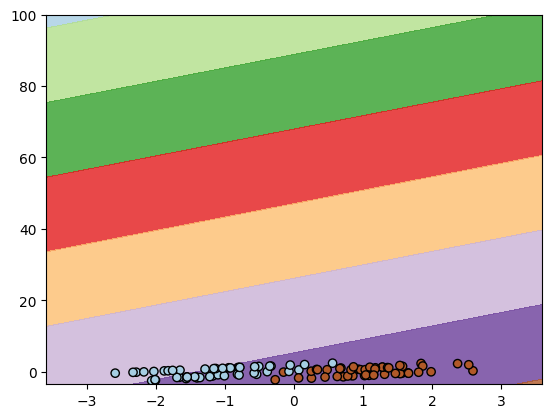

In [58]:
plt.contourf(xx,yy,z,alpha=0.8,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,edgecolor="k",cmap=plt.cm.Paired)